In [1]:
# conda install -c conda-forge wordcloud=1.2.1 

In [2]:
# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

Wordcloud is installed and imported!


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from PIL import Image

import plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff

py.offline.init_notebook_mode(connected=True)

In [4]:
# Importing the dataset
zomato = pd.read_csv('zomato.csv')

# Viewing 5 random sample from the dataframe
zomato.sample(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
2205,6079,Break Fast Point,1,New Delhi,"27, Satnam Park, Bhagat Singh Road, Chander Na...",Chander Nagar,"Chander Nagar, New Delhi",77.282045,28.655501,North Indian,...,Indian Rupees(Rs.),No,No,No,No,1,3.3,Orange,Average,21
2267,302859,Grover Eating Point,1,New Delhi,"1476, Deewan Hall Road, Chandni Chowk, New Delhi",Chandni Chowk,"Chandni Chowk, New Delhi",77.235292,28.657018,North Indian,...,Indian Rupees(Rs.),No,No,No,No,1,0.0,White,Not rated,1
4150,18431416,The Grill Point,1,New Delhi,"A-2, Krishna Nagar Extension, Krishna Nagar, N...",Krishna Nagar,"Krishna Nagar, New Delhi",0.000000,0.000000,"Chinese, Mughlai, North Indian",...,Indian Rupees(Rs.),No,No,No,No,1,3.0,Orange,Average,4
2829,7247,Ooh Lala !,1,New Delhi,"Food Court, 2nd Floor, DLF Promenade Mall, Vas...","DLF Promenade Mall, Vasant Kunj","DLF Promenade Mall, Vasant Kunj, New Delhi",77.155569,28.542648,"American, Fast Food, Desserts",...,Indian Rupees(Rs.),No,No,No,No,2,4.0,Green,Very Good,154
5652,18218787,Smokshh The Lounge,1,New Delhi,"Building 2, 2nd Floor, Vaishali Enclave, Pitam...",Pitampura,"Pitampura, New Delhi",77.136966,28.699994,"Cafe, North Indian, Chinese",...,Indian Rupees(Rs.),No,No,No,No,2,3.4,Orange,Average,25


In [5]:
# Size of the data
zomato.shape

(9551, 21)

In [6]:
# removing duplicates if any
zomato.drop_duplicates(subset = 'Restaurant ID', keep = 'first', inplace = True)

# Size of the data
zomato.shape

(9551, 21)

In [7]:
# replacing country codes to country names
zomato.replace({
    'Country Code' : {
        1 : 'India',
        14 : 'Australia',
        30 : 'Brazil',
        37 : 'Canada',
        94 : 'Indonesia',
        148 : 'New Zealand',
        162 : 'Phillipines',
        166 : 'Qatar',
        184 : 'Singapore',
        189 : 'South Africa',
        191 : 'Sri Lanka',
        208 : 'Turkey',
        214 : 'UAE',
        215 : 'United Kingdom',
        216 : 'United States',
    }
}, inplace = True)

# renaming col country code to country 
zomato.rename(columns = {'Country Code' : 'Country'}, inplace = True)

# 5 random samples of the data
zomato.sample(5)

,Restaurant ID,Restaurant Name,Country,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
747,18237322,Tandoor on The Way,India,Gurgaon,"U-8/45, Near Rapid Metro Station, DLF Phase 3,...",DLF Phase 3,"DLF Phase 3, Gurgaon",77.093544,28.493165,Fast Food,...,Indian Rupees(Rs.),No,Yes,No,No,1,3.2,Orange,Average,45
8762,7000162,Giapo,New Zealand,Auckland,"12 Gore Street, Auckland CBD, Auckland",Britomart,"Britomart, Auckland",174.768851,-36.845553,"Ice Cream, Desserts",...,NewZealand($),No,No,No,No,1,4.7,Dark Green,Excellent,617
9062,7602204,El Cartel,United Kingdom,Edinburgh,"64 Thistle Street, New Town, Edinburgh EH2 1EN",New Town,"New Town, Edinburgh",-3.199521,55.954040,Mexican,...,Pounds(��),No,No,No,No,3,3.8,Yellow,Good,31
8705,7300483,Zaz�� Bistr�� Tropical,Brazil,Rio de Janeiro,"Rua Joana Ang�lica, 40, Ipanema, Rio de Janeiro",Ipanema,"Ipanema, Rio de Janeiro",-43.205208,-22.985319,Brazilian,...,Brazilian Real(R$),No,No,No,No,4,4.6,Dark Green,Excellent,21
4661,304254,Anupam Hotel,India,New Delhi,"A 60, Main Market Road, New Ashok Nagar, Near,...",Mayur Vihar Phase 1,"Mayur Vihar Phase 1, New Delhi",77.307883,28.590196,North Indian,...,Indian Rupees(Rs.),No,No,No,No,1,0.0,White,Not rated,2


In [31]:
zomato.Country.unique()

array(['India', 'Australia', 'Brazil', 'Canada', 'Indonesia',
       'New Zealand', 'Phillipines', 'Qatar', 'Singapore', 'South Africa',
       'Sri Lanka', 'Turkey', 'UAE', 'United Kingdom', 'United States'],
      dtype=object)

In [35]:
zomato.Country.value_counts().index.values

array(['India', 'United States', 'United Kingdom', 'South Africa', 'UAE',
       'Brazil', 'New Zealand', 'Turkey', 'Australia', 'Phillipines',
       'Indonesia', 'Qatar', 'Singapore', 'Sri Lanka', 'Canada'],
      dtype=object)

In [43]:
zomato.Country.value_counts().values

array([8652,  434,   80,   60,   60,   60,   40,   34,   24,   22,   21,
         20,   20,   20,    4])

In [55]:
zomato_world = go.Scatter(
    x = np.log(zomato.Country.value_counts().values),
    y = zomato.Country.value_counts().index.values,
    mode = 'markers',
    name = 'markers',
    text  = zomato.Country.value_counts().values
)

log_vals = np.log(zomato.Country.value_counts().values)

layout = go.Layout(
    shapes = [dict(
        type = 'line',
        xref = 'x',
        yref = 'y',
        x0 = 0,
        y0 = i,
        x1 = log_vals[i],
        y1 = i,
        line = dict(
            color='grey',
            width=1
        )
    ) for i in range(len(log_vals))],
    title = 'Lollipop Chart of Number of Zomato restaurants all over the world' + '<br />' + '(Hover on Dots to see the number of restaurants)',
    xaxis = dict(
        title = 'Log10 of Number of restaurants'
    ),
)

data = [zomato_world]
fig = go.Figure(data, layout)
py.offline.iplot(fig, filename='zomato-restaurants-world')

## Zomato India

In [83]:
zomato_India = zomato[zomato.Country == 'India']

zomato_India.sample(5)

,Restaurant ID,Restaurant Name,Country,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
8078,18410380,The Epicureans,India,Noida,"B-101, Near HDFC Bank, Sector 46, Near Sector ...",Sector 47,"Sector 47, Noida",77.372813,28.548098,"North Indian, Mughlai, Chinese",...,Indian Rupees(Rs.),No,No,No,No,2,3.4,Orange,Average,20
2469,309478,Ambrosia Bliss,India,New Delhi,"2nd Floor, L-51 to 54, Outer Circle, Connaught...",Connaught Place,"Connaught Place, New Delhi",77.222125,28.633867,"North Indian, Chinese, Italian, Continental",...,Indian Rupees(Rs.),Yes,No,No,No,3,4.0,Green,Very Good,2333
8589,3800477,The Creamery,India,Surat,"G 31, Someshwar Square, Opposite Aagam Bungalo...",Vesu,"Vesu, Surat",72.778666,21.149834,"Ice Cream, Desserts",...,Indian Rupees(Rs.),No,No,No,No,1,3.6,Yellow,Good,87
8225,4469,Binge Restaurant,India,Noida,"C-25, Ground Floor, Stellar IT Park, Sector 62...",Sector 62,"Sector 62, Noida",77.362545,28.612800,"North Indian, Chinese, Continental",...,Indian Rupees(Rs.),Yes,No,No,No,3,3.2,Orange,Average,325
6354,300267,Chocolate Square,India,New Delhi,"116, Satyaniketan, New Delhi",Satyaniketan,"Satyaniketan, New Delhi",77.168827,28.588081,"Bakery, Desserts",...,Indian Rupees(Rs.),No,No,No,No,1,3.4,Orange,Average,76


In [9]:
# Lets remove some noise from zomato_India dataset
zomato_India.drop(columns = ['Restaurant ID', 'Country', 'Currency', 'Rating color'], inplace = True)

# shape of dataset
print(zomato_India.shape)

# 5 random samples
zomato_India.sample(5)

(8652, 17)


,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating text,Votes
4847,Hari Om Bhojnalaya,New Delhi,"C-1, Opposite HDFC Bank, Model Town 3, New Delhi",Model Town 3,"Model Town 3, New Delhi",77.184776,28.708434,North Indian,400,No,No,No,No,1,3.2,Average,21
4030,Mr. Choy,New Delhi,"15, Middle Lane, Khan Market, New Delhi",Khan Market,"Khan Market, New Delhi",77.226819,28.599758,"Seafood, Chinese, Japanese, Vietnamese, Asian,...",1200,No,No,No,No,3,3.9,Good,287
3631,Janta Bakery,New Delhi,"43, Central Road, Bhogal, Jangpura, New Delhi",Jangpura,"Jangpura, New Delhi",77.248238,28.582393,"Bakery, Fast Food",150,No,No,No,No,1,3.6,Good,32
5304,Hotel Malabar,New Delhi,"37-A, Sarai Juliena, New Friends Colony, New D...",New Friends Colony,"New Friends Colony, New Delhi",77.272053,28.559827,"Kerala, Biryani",400,No,No,No,No,1,3.6,Good,129
1879,Vinayaka Mylari,Mysore,"79, Nazarbad Main Road, Near Police Station, D...",Doora,"Doora, Mysore",76.665808,12.308500,South Indian,300,No,No,No,No,1,4.2,Very Good,392


In [10]:
# So far in all the three or more samples, I have seen only 'NO' in 'Switch to order menu' and 'Is delivering now'
# Let us check this and remove these cols if they have all or most values as No.

print('Is delivering now : \n',zomato_India['Is delivering now'].value_counts(), '\n\n')
print('Switch to order menu : \n', zomato_India['Switch to order menu'].value_counts())

Is delivering now : 
 No     8618
Yes      34
Name: Is delivering now, dtype: int64 


Switch to order menu : 
 No    8652
Name: Switch to order menu, dtype: int64


In [11]:
# So yeah, my guess was correct !
# we will remove these two cols from the data-frame

zomato_India.drop(columns = ['Is delivering now', 'Switch to order menu'], inplace = True)

# 5 random samples
zomato_India.sample(5)

,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating text,Votes
6583,Vijay Eating Point,New Delhi,"S-562, School Block, Shakarpur, New Delhi",Shakarpur,"Shakarpur, New Delhi",77.278321,28.627923,"North Indian, Chinese",450,No,No,1,2.9,Average,4
6933,Bhatura King,New Delhi,"Tilak Nagar, New Delhi",Tilak Nagar,"Tilak Nagar, New Delhi",77.095418,28.636751,Street Food,150,No,No,1,2.9,Average,7
8215,Shree Ganesh M Cafe,Noida,"Noida Authority, Opposite Vijaya Bank, Sector ...",Sector 6,"Sector 6, Noida",77.317851,28.592093,South Indian,150,No,No,1,3.1,Average,7
4363,Lodhi Knights,New Delhi,"Shop 14, Tejdar Babbar Market, Khanna Market, ...",Lodhi Colony,"Lodhi Colony, New Delhi",77.220243,28.585328,Fast Food,200,No,No,1,3.1,Average,8
74,Bharawan Da Dhaba,Amritsar,"Near Amritsar Municipal Corporation, Town Hall...",Town Hall,"Town Hall, Amritsar",74.878333,31.626153,"North Indian, Fast Food",500,No,No,2,3.5,Good,461


In [84]:
zomato_India['Rating color'].value_counts()

Orange        3678
White         2139
Yellow        1847
Green          692
Red            180
Dark Green     116
Name: Rating color, dtype: int64

## Now lets do some visualisation !

In [80]:
zomato_India['Rating text'].value_counts()

Average      3678
Not rated    2139
Good         1847
Very Good     692
Poor          180
Excellent     116
Name: Rating text, dtype: int64

KeyError: 'Rating color'

In [12]:
cities10_name = zomato_India.City.value_counts()[:9].index
cities10_value_log = np.log(zomato_India.City.value_counts()[:9])

data = [go.Bar(
            x = cities10_name,
            y = cities10_value_log,
            text = cities10_name,
            marker=dict(
                color=['red', 'orange',
               'green', 'blue','violet',
               'rgba(204,204,204,1)','rgba(204,204,204,1)',
               'rgba(204,204,204,1)','rgba(204,204,204,1)',
               'rgba(204,204,204,1)']),
        )]

layout = go.Layout(
    title = 'Top 10 citites for zomato',
    xaxis = dict(
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis = dict(
        title='Log10 of Number of Restaurant',
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        ),
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
    )
)

fig = go.Figure(data = data, layout = layout)

py.offline.iplot(fig, filename='color-bar')

Seems like people of NCR are quiet foody as all top 5 cities are from NCR. <br />
The other suprising thing to note here is that cities like mumbai, banglore, hyderabad, chennai, kolkata are not in the top 10 for zomato !

In [13]:
zomato_India['Average Cost for two'].replace({
    0: zomato_India['Average Cost for two'].mean()
}, inplace = True)

zomato_India['Average Cost for two'].describe()

count    8652.000000
mean      624.018762
std       595.336340
min        50.000000
25%       300.000000
50%       450.000000
75%       700.000000
max      8000.000000
Name: Average Cost for two, dtype: float64

In [14]:
trace0 = go.Bar(
    x = zomato_India['Average Cost for two'].value_counts().index,
    y = np.log(zomato_India['Average Cost for two'].value_counts().values),
    text = (zomato_India['Average Cost for two'].value_counts().values),
)

layout = go.Layout(
    barmode ='group',
    shapes = [
        # Line reference to the axes
        {
            'type': 'line',
            'xref': 'x',
            'yref': 'y',
            'x0': 624.018762,
            'y0': 0,
            'x1': 624.018762,
            'y1': 8,
            'line': {
                'color': 'red',
                'width': 3,
                'dash': 'dashdot',
            },
        },
    ],
    annotations = [
        dict(
            x = 640,
            y = 7,
            xref = 'x',
            yref = 'y',
            text = 'Average Price = 624.018 Rs',
            showarrow = True,
            arrowhead = 3,
            ax = 100,
            ay = 0,
        )
    ],
    title = go.layout.Title(
        text='Avg Cost for 2',
    ),
    xaxis = go.layout.XAxis(
        title = go.layout.xaxis.Title(
            text = 'Average Price in Rs. for Two People',
            font = dict(
                family = 'Courier New, monospace',
                size = 18,
                color = '#7f7f7f'
            )
        )
    ),
    yaxis = go.layout.YAxis(
        title = go.layout.yaxis.Title(
            text = 'Log10 of Number of restaurants',
            font = dict(
                family = 'Courier New, monospace',
                size = 18,
                color = '#7f7f7f'
            )
        )
    )
)

data = [trace0]

fig = go.Figure(data = data, layout = layout)
py.offline.iplot(fig, filename='grouped-bar')

Average price is around 625Rs and most of the restaurants are 500Rs for 2 people.

In [15]:
zomato_India.sample(5)

,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating text,Votes
5546,Cafe Coffee Day,New Delhi,"A3/320, Jwala Heri Market, Paschim Vihar, New ...",Paschim Vihar,"Paschim Vihar, New Delhi",77.102455,28.670042,Cafe,450.0,No,No,1,3.3,Average,40
6905,Aqua - The Park,New Delhi,"The Park, 15, Parliament Street, Connaught Pla...","The Park, Connaught Place","The Park, Connaught Place, New Delhi",77.216002,28.628885,"Continental, Italian, Mediterranean",4500.0,Yes,No,4,3.8,Good,773
5685,Jeet Pizza,New Delhi,"QU Block Market, Pitampura, New Delhi",Pitampura,"Pitampura, New Delhi",77.141626,28.712231,"Pizza, Fast Food",200.0,No,Yes,1,0.0,Not rated,3
5573,Quality Cake Shop,New Delhi,"1/2, Opposite White House, Sunder Vihar, Pasch...",Paschim Vihar,"Paschim Vihar, New Delhi",77.092179,28.663641,"Desserts, Fast Food, Chinese",350.0,No,Yes,1,3.2,Average,92
7434,Instapizza,Noida,"Food Court, DLF Mall of India, Sector 18, Noida","DLF Mall of India, Sector 18, Noida","DLF Mall of India, Sector 18, Noida, Noida",77.320944,28.567026,"Pizza, Fast Food",900.0,No,Yes,2,3.7,Good,214


In [56]:
zomato_India['Aggregate rating'].replace(0, np.nan, inplace = True)

In [57]:
# Price range vs ratings || Average cost for 2 vs rating
zomato_India['Aggregate rating'].describe()

count    6513.000000
mean        3.352034
std         0.504689
min         1.800000
25%         3.000000
50%         3.300000
75%         3.700000
max         4.900000
Name: Aggregate rating, dtype: float64

In [71]:
pvr = go.Scatter(
    y = zomato_India['Aggregate rating'],
    x = zomato_India['Average Cost for two'],
    mode = 'markers',
    marker = dict(
        size = 6,
        color = zomato_India['Aggregate rating'], #set color equal to a variable
        colorscale = 'Viridis',
        showscale = True
    ),
)

pvr_mean = go.Scatter(
    y = [3.352034],
    x = [624.018762],
    mode = 'markers',
    marker = dict (
        size = 8,
        color = 'red',
        showscale = False,
    ),
    text = '(Mean Rating, Mean price)',
)

layout = go.Layout(
    hovermode = 'closest',
)

data = [pvr, pvr_mean]
fig = go.Figure(data = data, layout = layout)
py.offline.iplot(data, filename='scatter-plot-with-colorscale')

In [18]:
# Not much relation btw price n rating, for all prices the ratings are good n bad    
# Although intersting to note here that the avg rating is 2.5 / 5, which is not so good, so mostly people unhappy with the food.

In [19]:
# price range vs rating karna hai abhi

In [20]:
# Has Table booking	

zomato_India['Has Table booking'].describe()

count     8652
unique       2
top         No
freq      7541
Name: Has Table booking, dtype: object

In [21]:
zomato_India['Has Table booking'].value_counts()

No     7541
Yes    1111
Name: Has Table booking, dtype: int64

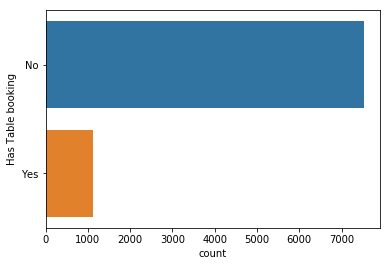

In [78]:
sns.countplot(y = zomato_India['Has Table booking'], data = zomato_India)

In [22]:
mapbox_access_token = 'pk.eyJ1IjoiYXZpa2FzbGl3YWwiLCJhIjoiY2p4MDhzYjI0MTg1bjQwcG05cjZqNjRtaiJ9.9MKul4M02Wp2TV3Fx-TwoQ'

data = [
    go.Scattermapbox(
        lat = zomato_India['Latitude'],
        lon = zomato_India['Longitude'],
        mode = 'markers',
        marker = go.scattermapbox.Marker(
            size = 5
        ),
        text = zomato_India['Restaurant Name'],
    )
]

layout = go.Layout(
    autosize = True,
    hovermode = 'closest',
    mapbox = go.layout.Mapbox(
        accesstoken = mapbox_access_token,
        bearing = 0,
        center = go.layout.mapbox.Center(
            lat = 28.52,
            lon = 77.37
        ),
        pitch = 1,
        zoom = 10,
        style = 'light'
    ),
)

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig, filename='Multiple Mapbox')

In [23]:
zomato_India.sample(5)

,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating text,Votes
8532,Effingut Brewerkz,Pune,"4, Deron Heights, Next to Ranka Jewellers, Ban...",Baner,"Baner, Pune",73.798206,18.554382,"Continental, North Indian, Mughlai, Burmese",2000.0,No,Yes,4,4.3,Very Good,375
2305,Roll n Roast,New Delhi,"7, Market 1, Chittaranjan Park, New Delhi",Chittaranjan Park,"Chittaranjan Park, New Delhi",77.248582,28.540011,"North Indian, Chinese",250.0,No,No,1,3.3,Average,27
214,On The Go,Coimbatore,"167, Race Course Road, Gopalapuram, Race Cours...",Race Course,"Race Course, Coimbatore",76.975525,11.003681,"Italian, North Indian, Desserts",1500.0,No,No,4,4.0,Very Good,215
7585,New Town Cafe - Park Plaza,Noida,"Park Plaza Hotel, C Block, Sector 55, Noida","Park Plaza Hotel, Sector 55, Noida","Park Plaza Hotel, Sector 55, Noida, Noida",77.349716,28.603791,"Continental, Chinese, North Indian",2800.0,Yes,No,4,4.1,Very Good,228
8514,Cafe Ole,Puducherry,"319, Mission Street, MG Road, Puducherry",MG Road,"MG Road, Puducherry",79.830156,11.929947,"Cafe, Continental",700.0,No,No,3,3.8,Good,199


In [24]:
x = []
y = (zomato_India['Cuisines'][0].split(','))
x += y
x

['North Indian', ' Mughlai']

In [25]:
y = (zomato_India['Cuisines'][1].split(','))
x += y
x

['North Indian', ' Mughlai', 'North Indian', ' Mughlai']

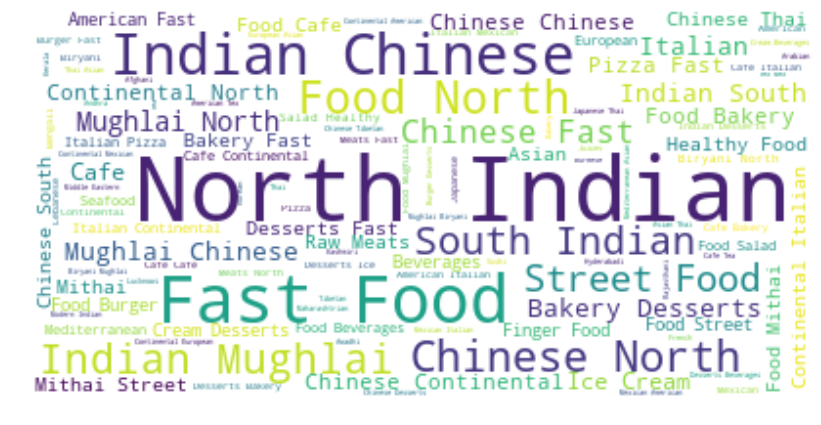

In [26]:
zomato_cuisines = []
for c in zomato_India['Cuisines']:
    listc = c.split(',')
    zomato_cuisines += listc
    
zomato_cuisines_text = ''
for text in zomato_cuisines:
    zomato_cuisines_text += (text + ' ')
    
stopwords = set(STOPWORDS)

# instantiate a word cloud object
zomato_wc = WordCloud(
    background_color = 'white',
    max_words = 2000,
    stopwords = stopwords
)

# generate the word cloud
zomato_wc.generate(zomato_cuisines_text)

fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

# display the word cloud
plt.imshow(zomato_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [27]:
# Download the image
!wget --quiet https://www.redbytes.in/wp-content/uploads/2018/09/zomato-logo-AD6823E433-seeklogo.com_.png
    
# save mask to alice_mask
zomato_mask = np.array(Image.open('zomato-logo-AD6823E433-seeklogo.com_.png'))
    
print('Image downloaded and saved!')

Image downloaded and saved!


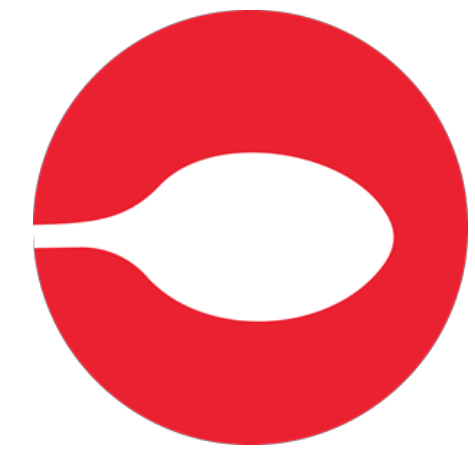

In [28]:
fig = plt.figure()
fig.set_figwidth(8) # set width
fig.set_figheight(8) # set height

plt.imshow(zomato_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

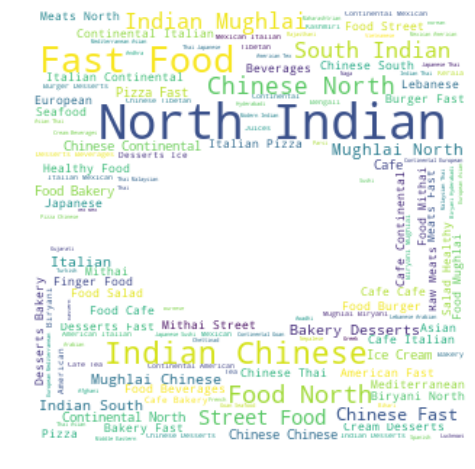

In [29]:
# instantiate a word cloud object
zomato_wc = WordCloud(background_color='white', max_words=2000, mask=zomato_mask, stopwords=stopwords)

# generate the word cloud
zomato_wc.generate(zomato_cuisines_text)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(8) # set width
fig.set_figheight(8) # set height

plt.imshow(zomato_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [79]:
zomato_India['Aggregate rating'].value_counts()

3.1    511
3.2    510
3.4    477
3.3    472
3.0    465
3.5    454
3.6    411
2.9    380
3.7    363
3.8    336
2.8    314
3.9    283
2.7    250
4.0    193
2.6    190
4.1    185
4.2    140
2.5    109
4.3    100
2.4     83
4.4     74
2.3     46
4.5     37
4.6     35
2.2     26
4.9     19
4.7     16
2.1     15
4.8      9
2.0      7
1.9      2
1.8      1
Name: Aggregate rating, dtype: int64